Threshold: 0.00, CV_score: 0.7706
Threshold: 0.05, CV_score: 0.7706
Threshold: 0.10, CV_score: 0.7741
Threshold: 0.15, CV_score: 0.7759
Threshold: 0.20, CV_score: 0.7693


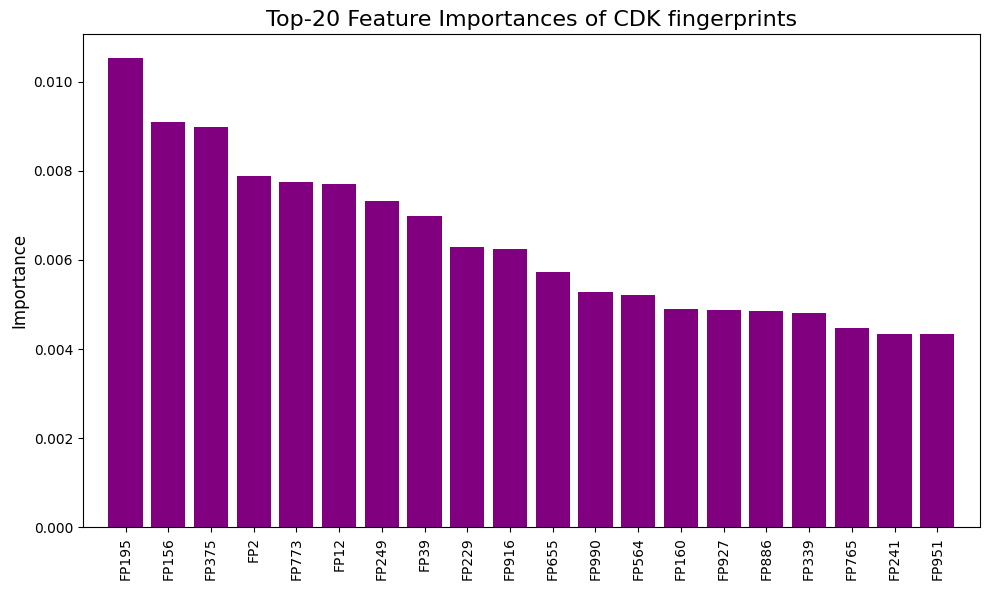


Best_threshold: 0.15, Best_CV_score: 0.7759


In [34]:
# Molecular Features 
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel('CDK_FP_Non_steroidal_ALL.xlsx')
df = df1.drop('SMILES', axis=1)
X = df.drop('Activity', axis=1)
y = df['Activity']


thresholds = np.arange(0.0, 0.25, 0.05)  
best_threshold = None
best_cv_score = 0
best_selected_features = None

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_reduced = selector.fit_transform(X)

    selected_features_indices = selector.get_support(indices=True)
    
    selected_features = X.columns[selected_features_indices]

    rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
    cv_scores = cross_val_score(rf_classifier, X_reduced, y, cv=5)  
    mean_cv_score = cv_scores.mean()

    print(f'Threshold: {threshold:.2f}, CV_score: {mean_cv_score:.4f}')
    
    if mean_cv_score > best_cv_score:
        best_cv_score = mean_cv_score
        best_threshold = threshold
        best_selected_features = selected_features

selector_best = VarianceThreshold(threshold=best_threshold)
X_best_reduced = selector_best.fit_transform(X)
selected_features_indices_best = selector_best.get_support(indices=True)
selected_features_best = X.columns[selected_features_indices_best]

rf_classifier.fit(X_best_reduced, y)

importances = rf_classifier.feature_importances_

plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1][:20]  

plt.title('Top-20 Feature Importances of CDK fingerprints', fontsize=16)

plt.bar(range(len(indices)), importances[indices], align='center', color='purple')

plt.xticks(range(len(indices)), selected_features_best[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.ylabel('Importance', fontsize=12)    

plt.tight_layout()  # Упаковка графика
plt.savefig('feature_importances_ARO_NS_CDK.png', format='png')
plt.show()  

print(f'\nBest_threshold: {best_threshold:.2f}, Best_CV_score: {best_cv_score:.4f}')

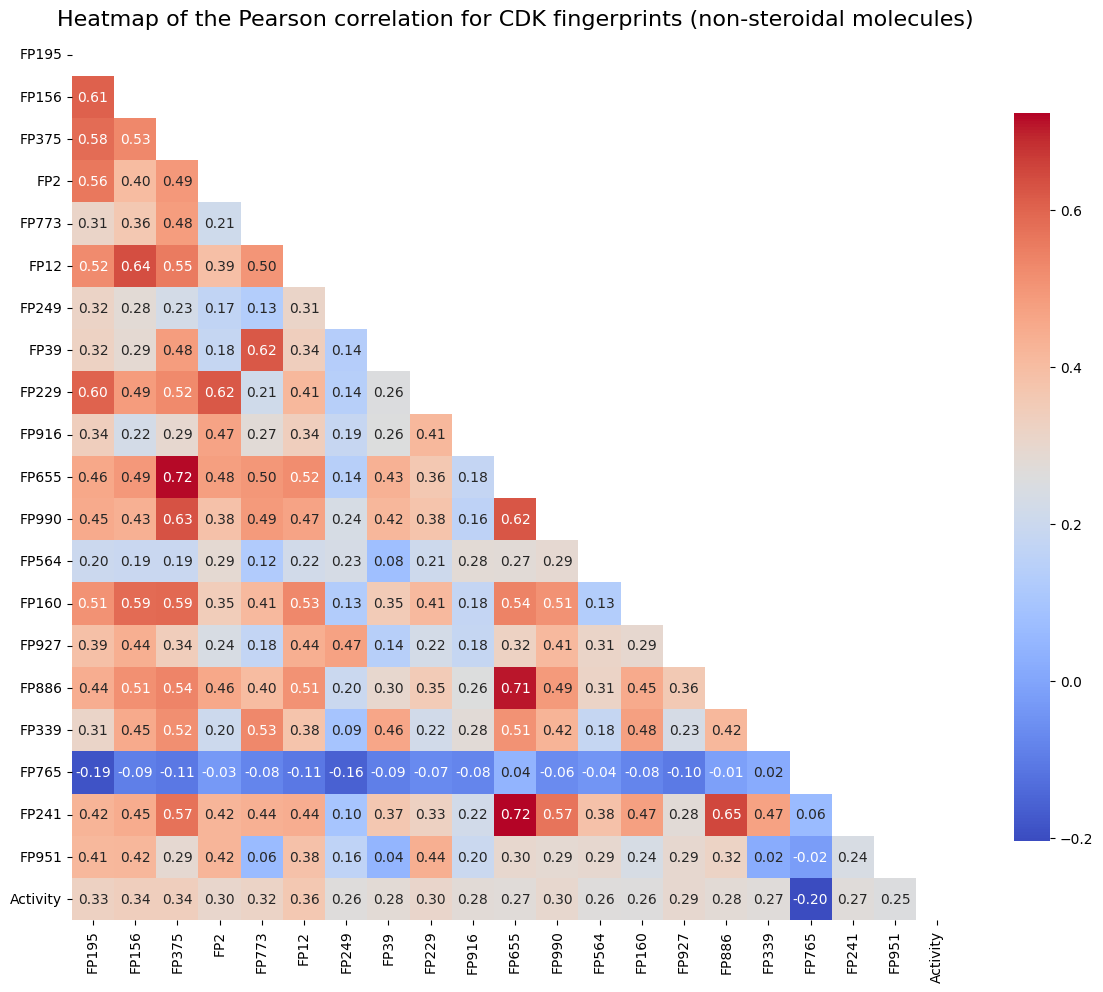

In [32]:
# Pearson Correlation
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_n = 20
indices = np.argsort(importances)[::-1][:top_n]

top_features_df = pd.DataFrame(X_best_reduced[:, indices], columns=selected_features_best[indices])
top_features_df['Activity'] = y.values  
correlation_matrix = top_features_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap of the Pearson correlation for CDK fingerprints (non-steroidal molecules)', fontsize=16)
plt.tight_layout()

plt.savefig('Correlation_Triangle_Heatmap_CDK.png', format='png')

In [42]:
#Chemical space distribution for Non-steroidal molecules using CDK FP
import pandas as pd
import plotly.express as px
import plotly.io as pio
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
pio.renderers.default = "notebook"


df1 = pd.read_excel('CDK_FP_Non_steroidal_ALL.xlsx')
df = df1.drop('SMILES', axis=1)
X = df.drop('Activity', axis=1)  
y = df['Activity']    

X = df.drop('Activity', axis=1)  
y = df['Activity']  

tsne = TSNE(n_components=3, random_state=42)  
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3'])
df_tsne['Class'] = y.values 

fig = px.scatter_3d(df_tsne, x='t-SNE Component 1', y='t-SNE Component 2', z='t-SNE Component 3',
                    color='Class', title='t-SNE Visualization',
                    labels={'Class': 'Class'},
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE Component 1',
        yaxis_title='t-SNE Component 2',
        zaxis_title='t-SNE Component 3'
    ),
    width=1000, 
    height=800   
)
fig.show()

<Figure size 640x480 with 0 Axes>


 GridSearch for RandomForest

 GridSearch for ExtraTrees

 GridSearch for AdaBoost

 GridSearch for KNN

 GridSearch for MLP

 GridSearch for LGBM
[LightGBM] [Info] Number of positive: 846, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 1824, number of used features: 1020
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.463816 -> initscore=-0.144990
[LightGBM] [Info] Start training from score -0.144990
[LightGBM] [Info] Number of positive: 676, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Lig

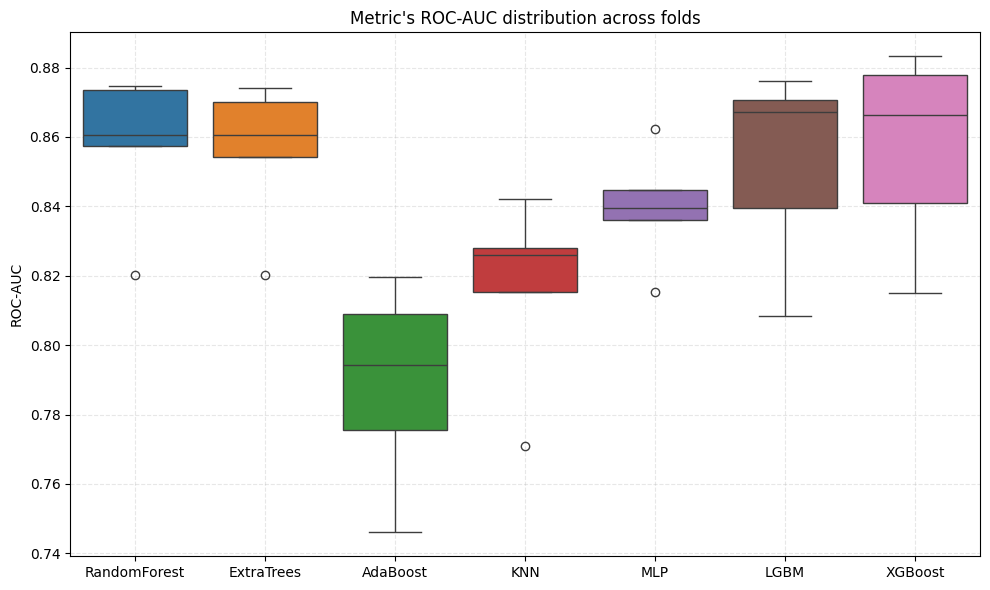

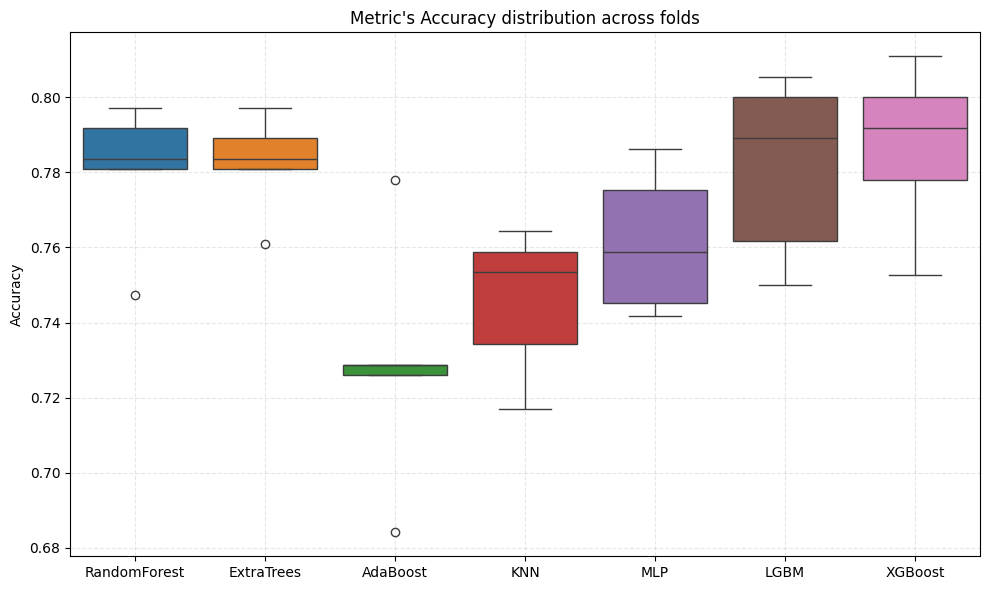

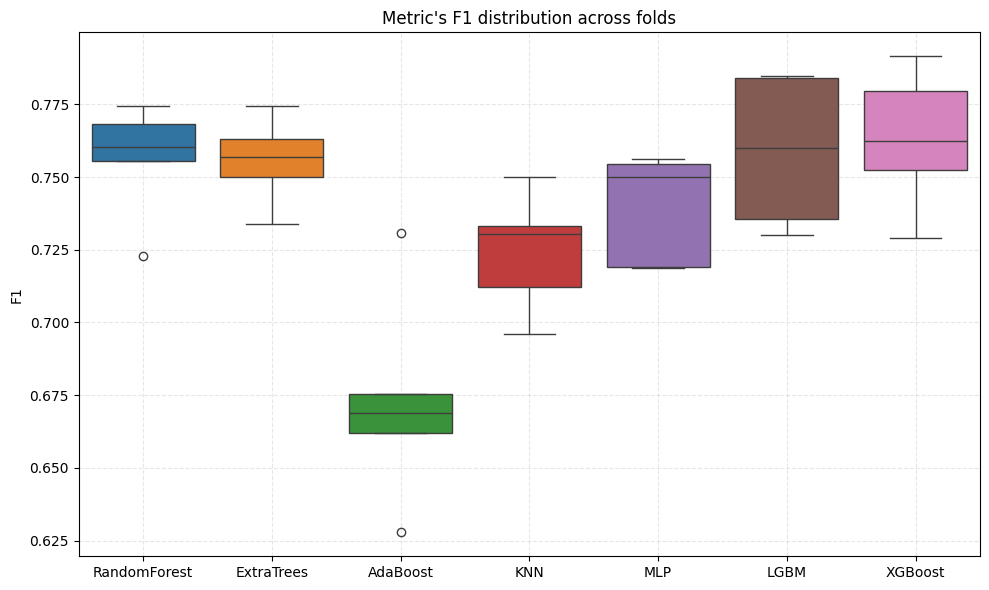

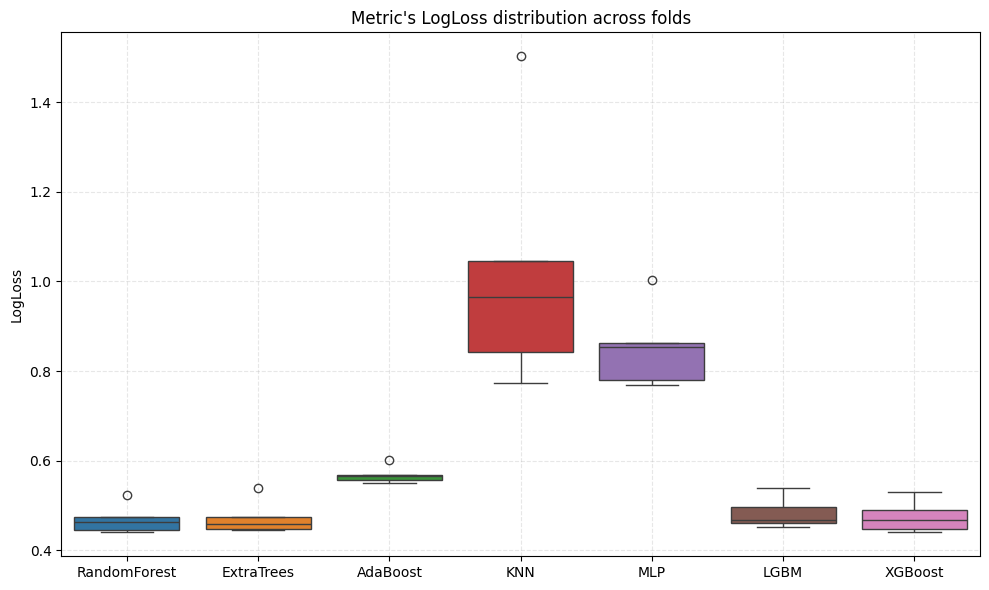

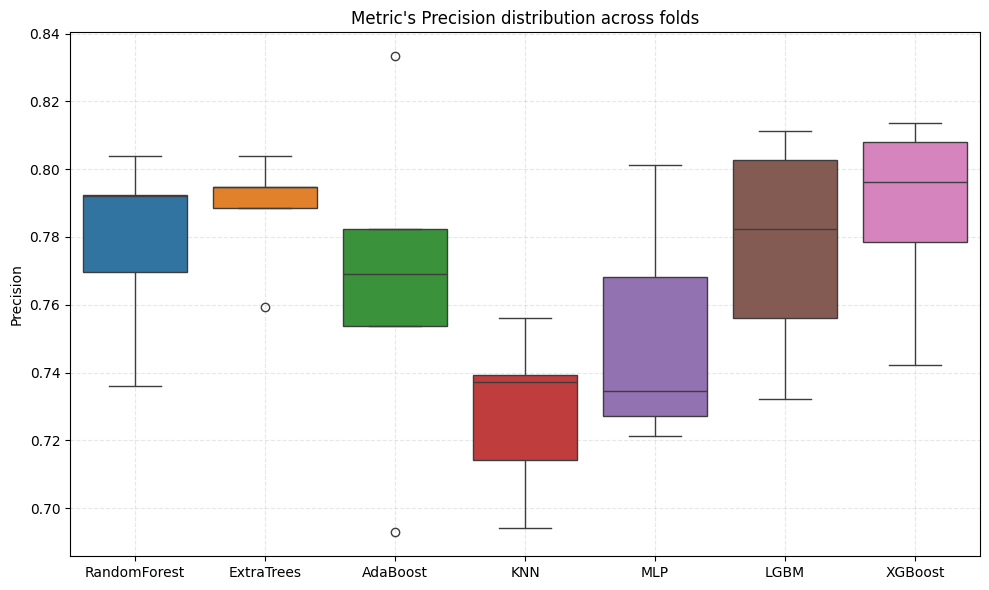

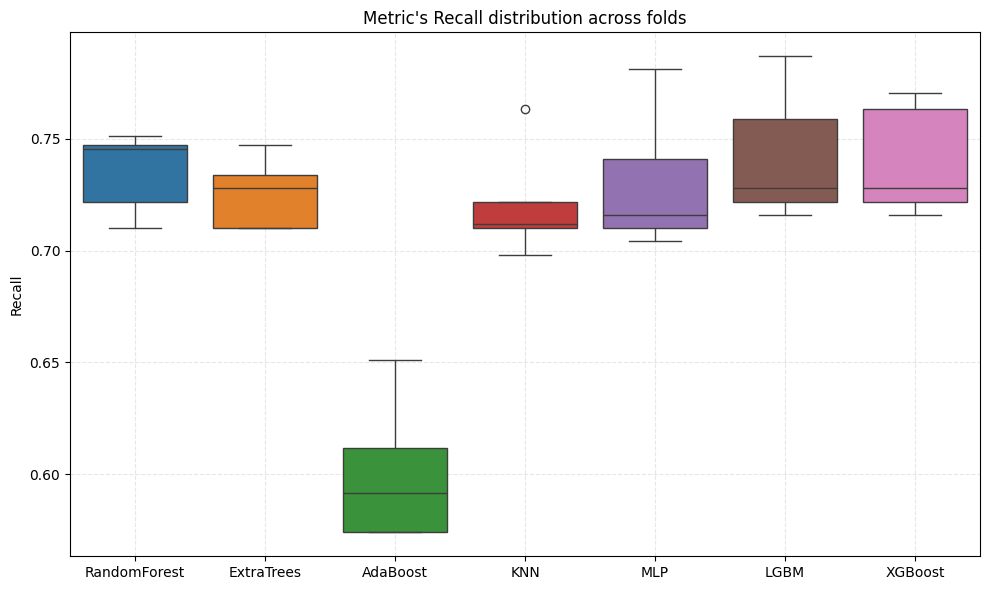


 Metrics for test set:
                ROC-AUC  Accuracy    Recall  Precision        F1   LogLoss
ExtraTrees    0.880123  0.802632  0.778302   0.793269  0.785714  0.447977
RandomForest  0.879002  0.802632  0.801887   0.779817  0.790698  0.453354
XGBoost       0.875947  0.774123  0.768868   0.751152  0.759907  0.453118
LGBM          0.869345  0.789474  0.801887   0.758929  0.779817  0.462252
KNN           0.864155  0.776316  0.792453   0.743363  0.767123  0.960523
MLP           0.843025  0.756579  0.773585   0.722467  0.747153  0.833948
AdaBoost      0.824544  0.750000  0.650943   0.775281  0.707692  0.544307


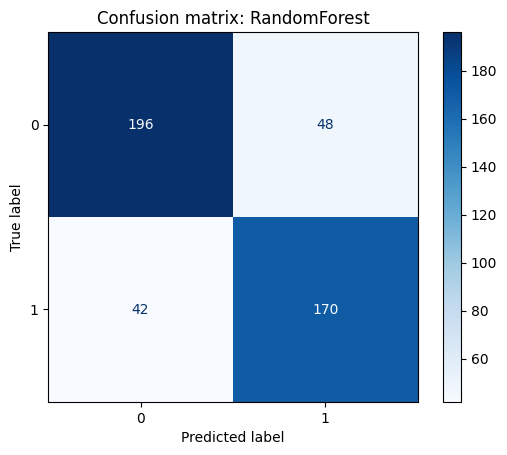

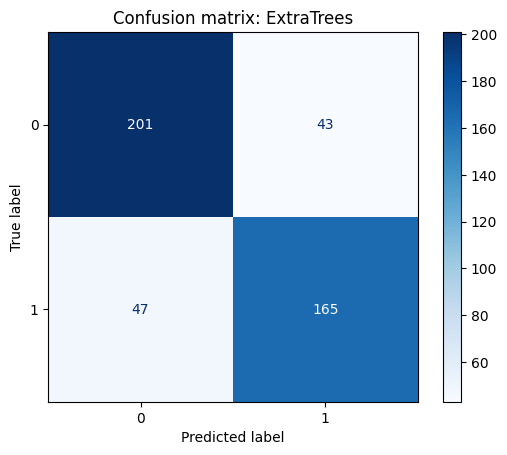

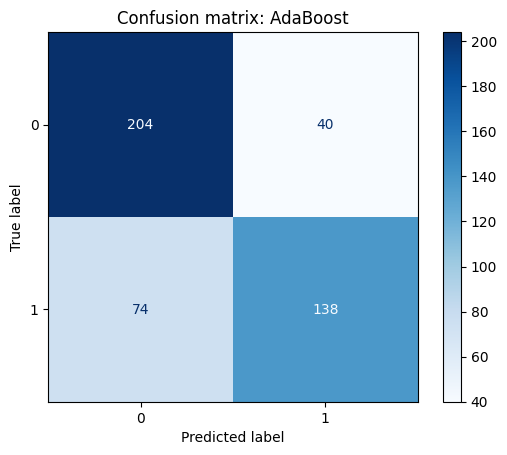

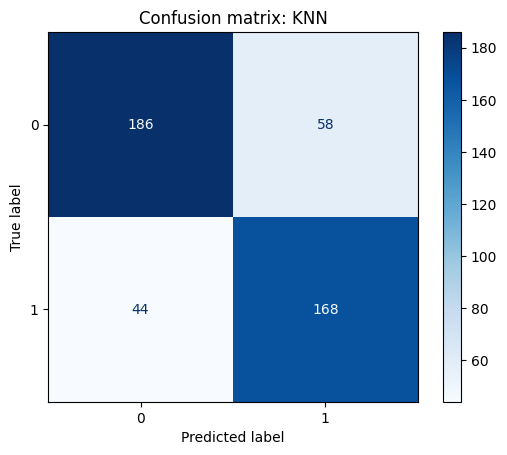

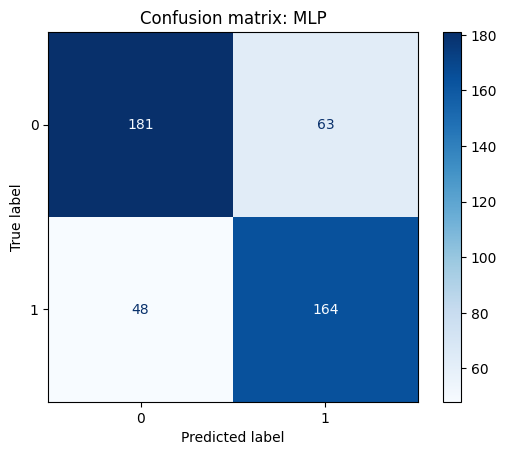

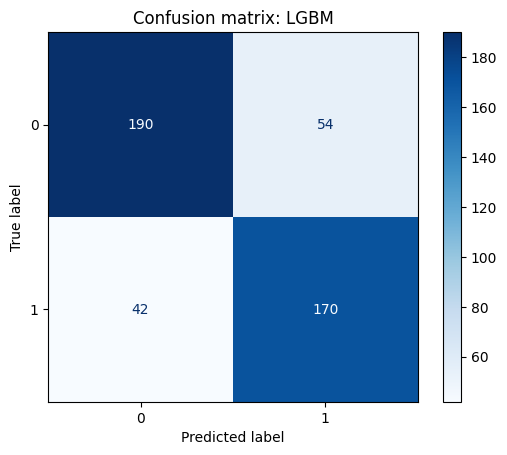

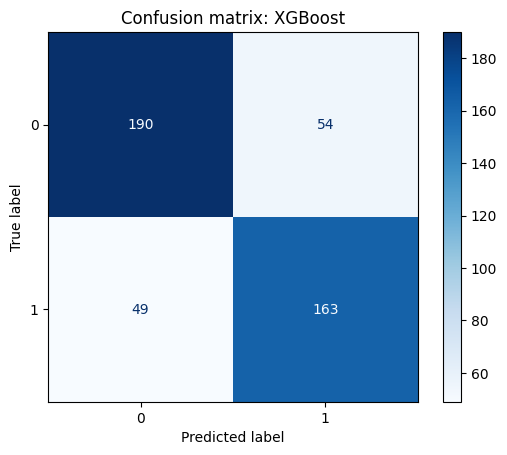

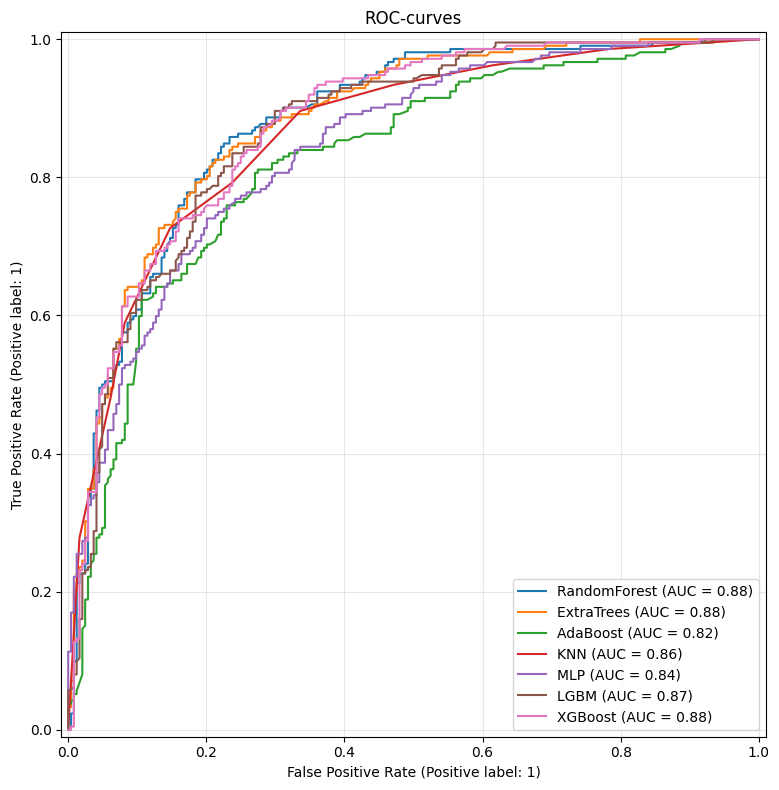

In [60]:
#7 ML Algorithms Comparison
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    roc_auc_score, accuracy_score, recall_score,
    precision_score, f1_score, log_loss,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


df1 = pd.read_excel('CDK_FP_Non_steroidal_ALL.xlsx')
df = df1.drop('SMILES', axis=1)
X = df.drop('Activity', axis=1)  
y = df['Activity']    

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# The range of Hyperparameters
model_params = {
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", "log2"]
    }),
    "ExtraTrees": (ExtraTreesClassifier(random_state=42), {
        "n_estimators": [100, 500],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", "log2"]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }),
    "MLP": (MLPClassifier(max_iter=1000, random_state=42), {
        "hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001],
        "learning_rate": ["constant", "adaptive"]
    }),
    "LGBM": (LGBMClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "num_leaves": [31, 50],
        "max_depth": [-1, 10, 20]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 6, 10],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    })
}

results = {}
cv_results = {}
best_models = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, (model, params) in model_params.items():
    print(f"\n GridSearch for {name}")
    grid = GridSearchCV(model, params, cv=cv, scoring="neg_log_loss", n_jobs=-1, refit=True)
    grid.fit(X_train_val, y_train_val)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    scores = {m: [] for m in ["ROC-AUC", "Accuracy", "Recall", "Precision", "F1", "LogLoss"]}

    for tr_idx, val_idx in cv.split(X_train_val, y_train_val):
        X_tr, X_val = X_train_val.iloc[tr_idx], X_train_val.iloc[val_idx]
        y_tr, y_val = y_train_val.iloc[tr_idx], y_train_val.iloc[val_idx]

        best_model.fit(X_tr, y_tr)
        y_pred = best_model.predict(X_val)
        y_proba = best_model.predict_proba(X_val)[:, 1]

        scores["ROC-AUC"].append(roc_auc_score(y_val, y_proba))
        scores["Accuracy"].append(accuracy_score(y_val, y_pred))
        scores["Recall"].append(recall_score(y_val, y_pred))
        scores["Precision"].append(precision_score(y_val, y_pred))
        scores["F1"].append(f1_score(y_val, y_pred))
        scores["LogLoss"].append(log_loss(y_val, y_proba))

    results[name] = {m: np.mean(v) for m, v in scores.items()}
    cv_results[name] = scores

results_df = pd.DataFrame(results).T
print("\n Models comparison (CV):\n", results_df.sort_values("ROC-AUC", ascending=False))

for metric in ["ROC-AUC", "Accuracy", "F1", "LogLoss", "Precision", "Recall"]:
    plt.figure(figsize=(10, 6))
    df_box = pd.DataFrame({name: cv_results[name][metric] for name in model_params})
    sns.boxplot(data=df_box)
    plt.title(f"Metric's {metric} distribution across folds")
    plt.ylabel(metric)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.savefig(f"{metric}_boxplot.png", format="png")
    plt.show()

test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    test_results[name] = {
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "LogLoss": log_loss(y_test, y_proba)
    }

test_results_df = pd.DataFrame(test_results).T
print("\n Metrics for test set:\n", test_results_df.sort_values("ROC-AUC", ascending=False))

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion matrix: {name}")
    plt.show()

plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())
plt.title("ROC-curves")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("ROC-curves.png", format="png")
plt.show()


Fitting 5 folds for each of 256 candidates, totalling 1280 fits

Best HP: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}

=== Train Set Comparison ===
Metric       |  Base ET |    Tuned ET
------------------------------------
Log Loss     |   0.0497 |      0.2442
ROC-AUC      |   0.9979 |      0.9815
Accuracy     |   0.9688 |      0.9243
Recall       |   0.9421 |      0.9043
Precision    |   0.9901 |      0.9307
F1-score     |   0.9655 |      0.9173

=== Test Set Comparison ===
Metric       |  Base ET |    Tuned ET
------------------------------------
Log Loss     |   1.8273 |      0.4212
ROC-AUC      |   0.8343 |      0.8950
Accuracy     |   0.7807 |      0.8158
Recall       |   0.7783 |      0.8160
Precision    |   0.7569 |      0.7936
F1-score     |   0.7674 |      0.8047


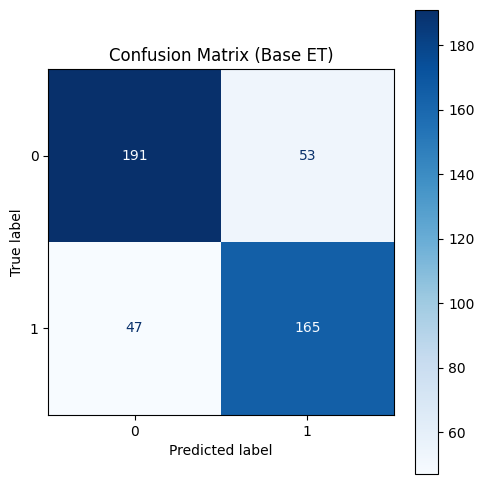

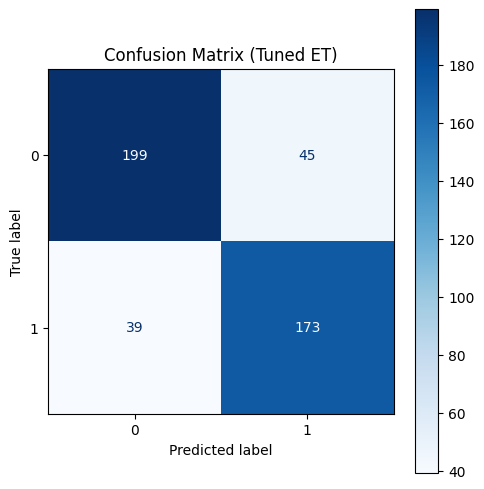

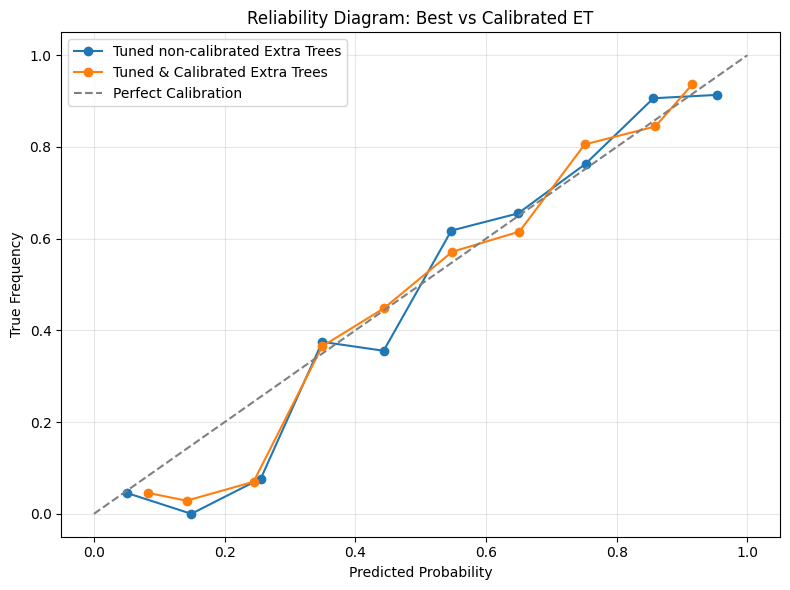

In [58]:
#Final Model Construction and Evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import joblib

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (
    log_loss, roc_auc_score, accuracy_score,
    recall_score, precision_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
warnings.filterwarnings("ignore")


df1 = pd.read_excel('CDK_FP_Non_steroidal_ALL.xlsx')
df = df1.drop('SMILES', axis=1)
X = df.drop('Activity', axis=1)  
y = df['Activity']   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

base_et = ExtraTreesClassifier(random_state=42)
base_et.fit(X_train, y_train)

y_base_train_prob = base_et.predict_proba(X_train)[:, 1]
y_base_train_pred = base_et.predict(X_train)

y_base_test_prob = base_et.predict_proba(X_test)[:, 1]
y_base_test_pred = base_et.predict(X_test)

# The range of hyperparameters
param_grid = {
    "n_estimators": [ 1000, 1500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.5, None],
}

grid_search = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring="neg_log_loss",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest HP:", grid_search.best_params_)

best_et = grid_search.best_estimator_

y_train_prob = best_et.predict_proba(X_train)[:, 1]
y_train_pred = best_et.predict(X_train)

y_test_prob = best_et.predict_proba(X_test)[:, 1]
y_test_pred = best_et.predict(X_test)

# Probability calibration
sigmoid_model = CalibratedClassifierCV(best_et, method='sigmoid', cv=5)
sigmoid_model.fit(X_train, y_train)

y_sigmoid_test_prob = sigmoid_model.predict_proba(X_test)[:, 1]
y_sigmoid_test_pred = sigmoid_model.predict(X_test)


def compare_models(name, y_true, y_pred_base, y_prob_base, y_pred_cal, y_prob_cal):
    print(f"\n=== {name} Set Comparison ===")
    print(f"{'Metric':<12} | {'Base ET':>8} | {'Tuned ET':>11}")
    print("-" * 36)
    for metric_name, func in [
        ("Log Loss", log_loss),
        ("ROC-AUC", roc_auc_score),
        ("Accuracy", accuracy_score),
        ("Recall", recall_score),
        ("Precision", precision_score),
        ("F1-score", f1_score)
    ]:
        base_val = func(y_true, y_prob_base if 'Loss' in metric_name or 'AUC' in metric_name else y_pred_base)
        cal_val = func(y_true, y_prob_cal if 'Loss' in metric_name or 'AUC' in metric_name else y_pred_cal)
        print(f"{metric_name:<12} | {base_val:8.4f} | {cal_val:11.4f}")

compare_models("Train", y_train, y_base_train_pred, y_base_train_prob, y_train_pred, y_train_prob)
compare_models("Test", y_test, y_base_test_pred, y_base_test_prob, y_sigmoid_test_pred, y_sigmoid_test_prob)

for title, y_pred in [("Base ET", y_base_test_pred), ("Tuned ET", y_sigmoid_test_pred)]:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    plt.figure(figsize=(5,5))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(f"Confusion Matrix ({title})")
    plt.tight_layout()
    plt.show()

#  Reliability Diagram 
plt.figure(figsize=(8,6))
for prob, label, color in [
    (y_test_prob, "Tuned non-calibrated Extra Trees", 'tab:blue'),
    (y_sigmoid_test_prob, "Tuned & Calibrated Extra Trees", 'tab:orange')
]:
    prob_true, prob_pred = calibration_curve(y_test, prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=label, color=color)

plt.plot([0,1],[0,1],'--', color='gray', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.title("Reliability Diagram: Best vs Calibrated ET")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Train dataset
train_results = X_train.copy()
train_results["SMILES"] = df1.loc[X_train.index, "SMILES"].values
train_results["Activity"] = y_train.values
train_results["Prediction"] = y_train_pred
train_results["Probability"] = y_train_prob
train_results.to_excel("Non_Steroidal_CDK_Train_Set_FINAL_Model.xlsx", index=False)

# Test dataset
test_results = X_test.copy()
test_results["SMILES"] = df1.loc[X_test.index, "SMILES"].values
test_results["Activity"] = y_test.values
test_results["Prediction"] = y_test_pred
test_results["Probability"] = y_test_prob
test_results.to_excel("Non_Steroidal_CDK_Test_Set_FINAL_Model.xlsx", index=False)




 GridSearch for RandomForest

 GridSearch for ExtraTrees

 GridSearch for AdaBoost

 GridSearch for KNN

 GridSearch for MLP

 GridSearch for LGBM
[LightGBM] [Info] Number of positive: 1127, number of negative: 1294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2421, number of used features: 1020
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465510 -> initscore=-0.138179
[LightGBM] [Info] Start training from score -0.138179
[LightGBM] [Info] Number of positive: 901, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of dat

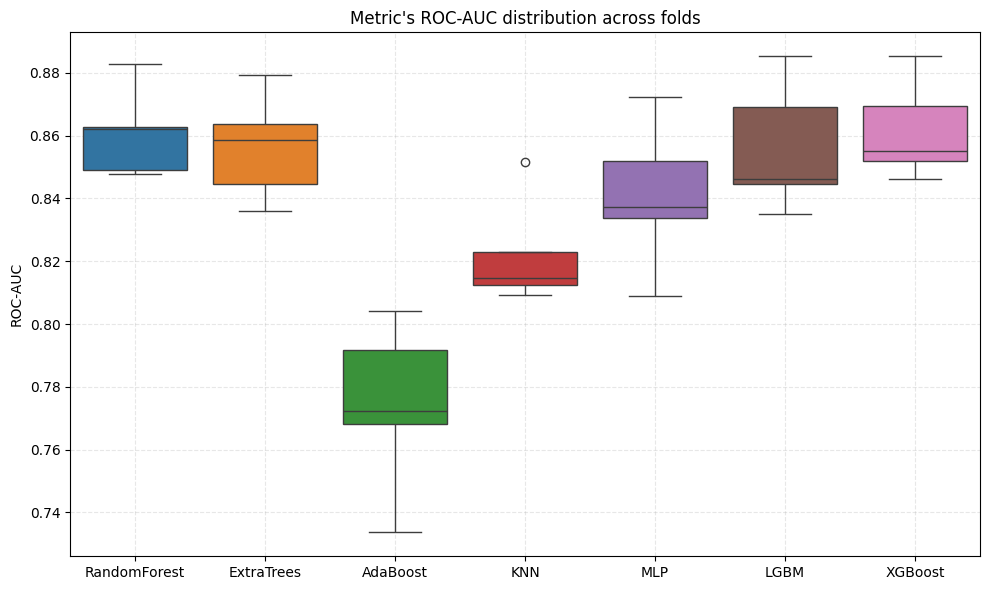

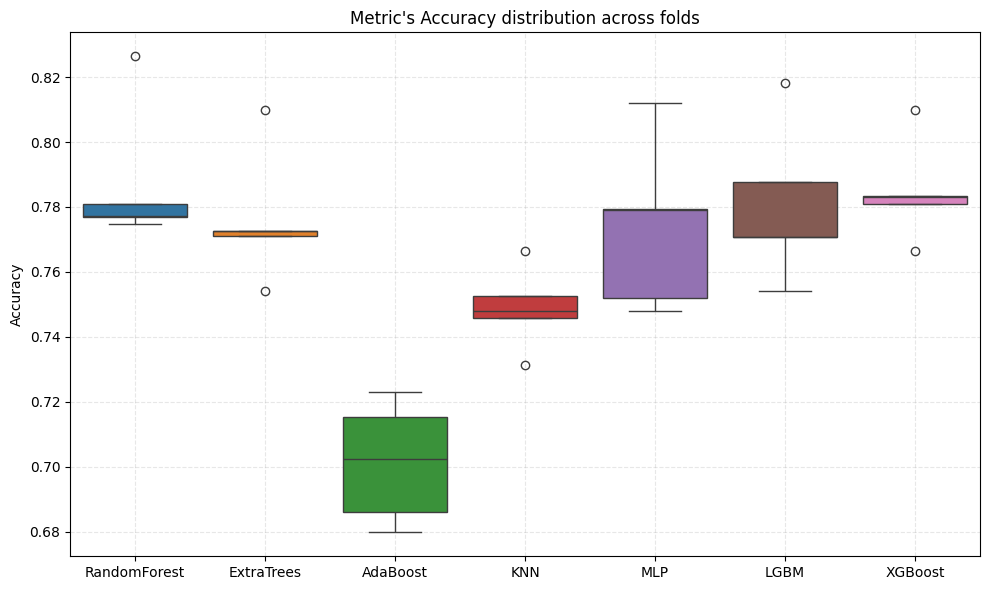

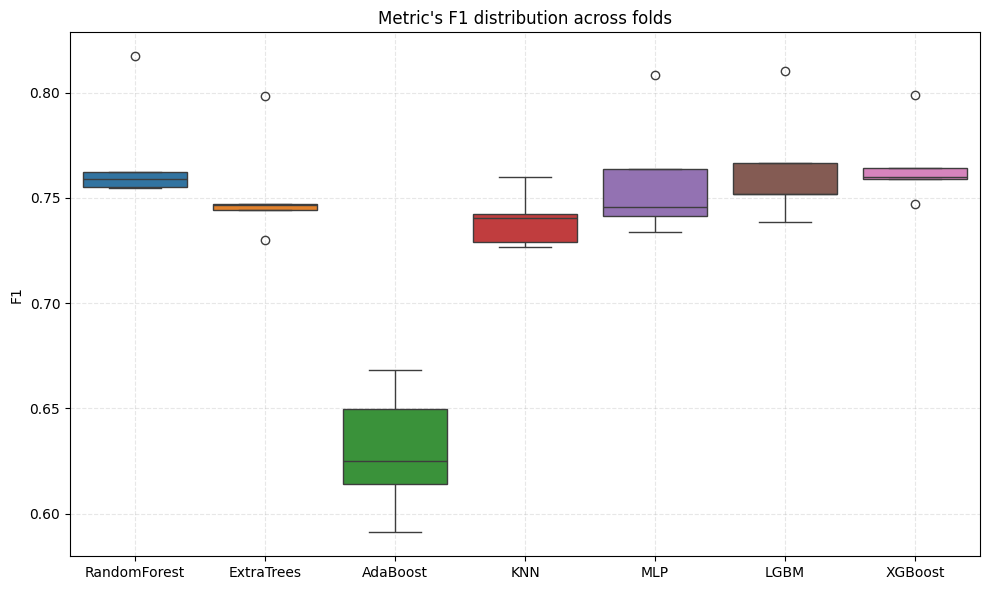

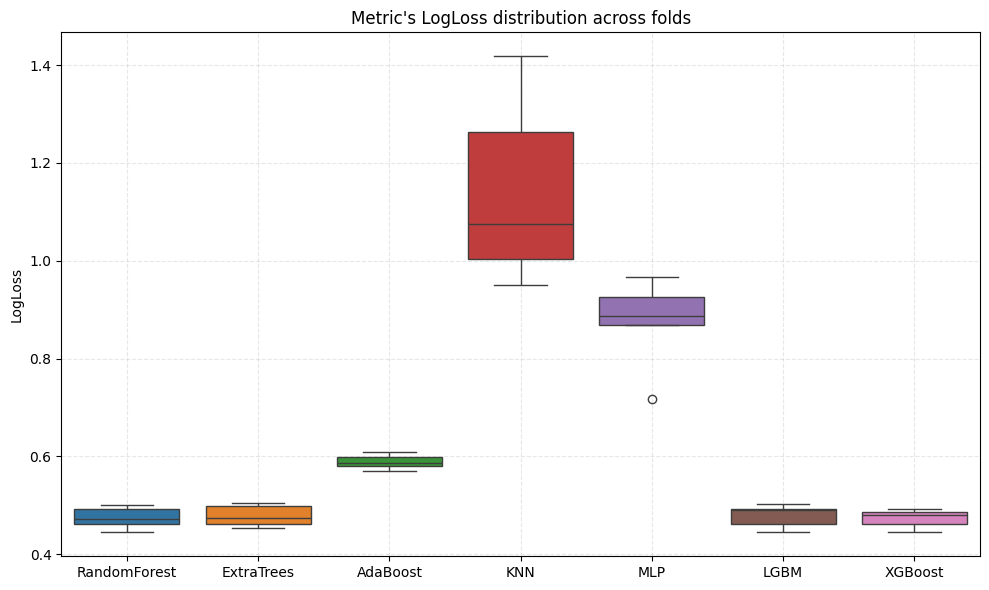

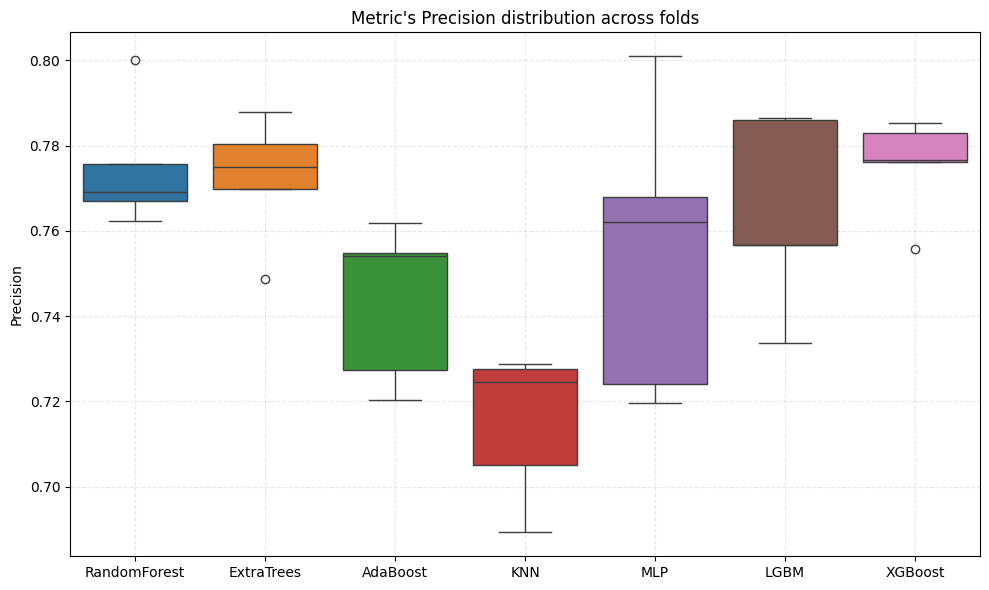

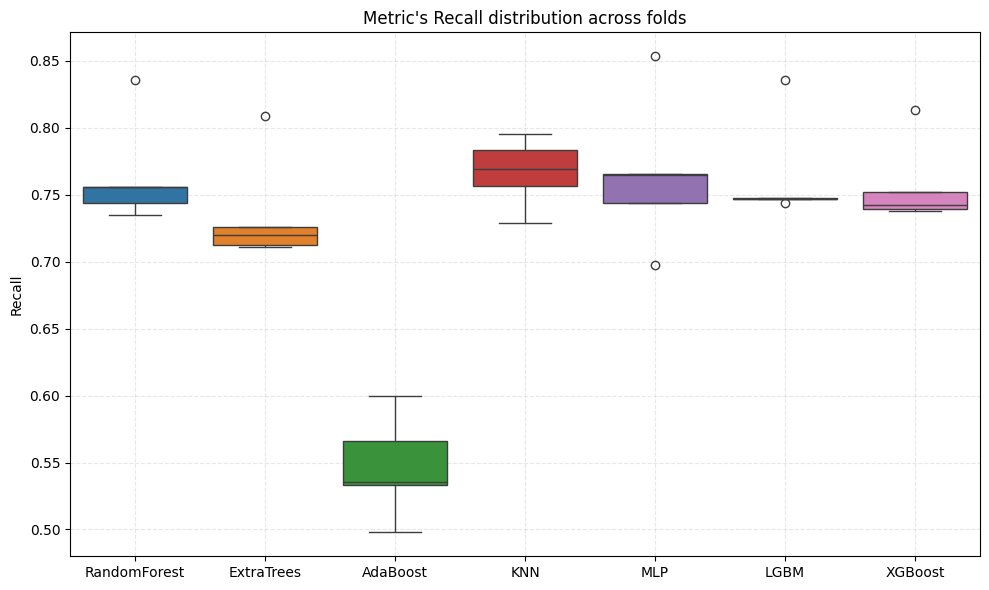


 Metrics for test set:
                ROC-AUC  Accuracy    Recall  Precision        F1   LogLoss
RandomForest  0.859841  0.793729  0.799320   0.780731  0.789916  0.465895
XGBoost       0.857901  0.792079  0.799320   0.778146  0.788591  0.478068
ExtraTrees    0.856102  0.793729  0.792517   0.784512  0.788494  0.477124
LGBM          0.855208  0.775578  0.768707   0.768707  0.768707  0.480439
MLP           0.833573  0.757426  0.768707   0.740984  0.754591  0.882051
KNN           0.833421  0.767327  0.806122   0.738318  0.770732  1.100894
AdaBoost      0.790233  0.696370  0.564626   0.747748  0.643411  0.586059


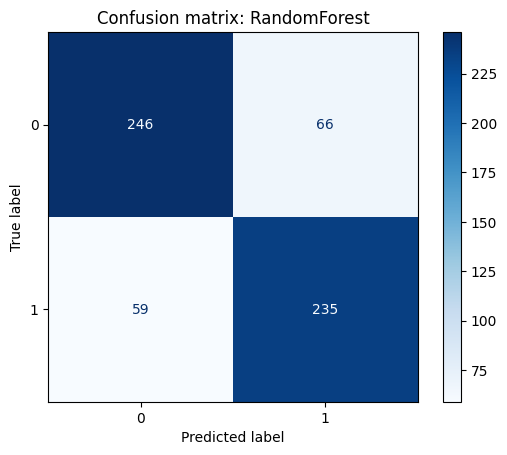

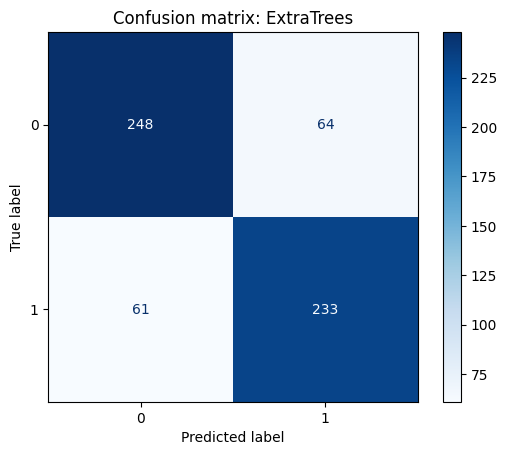

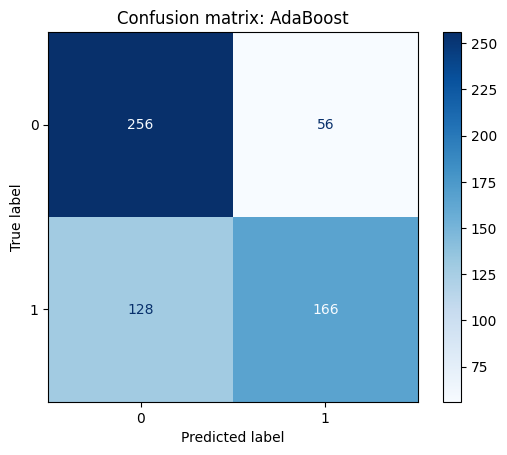

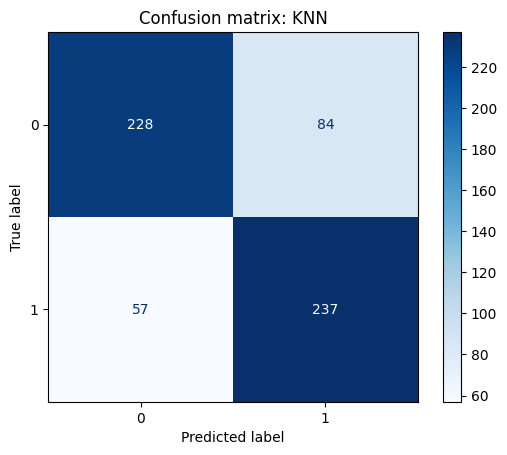

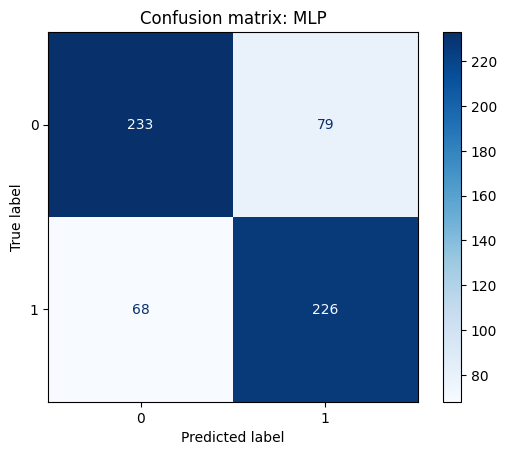

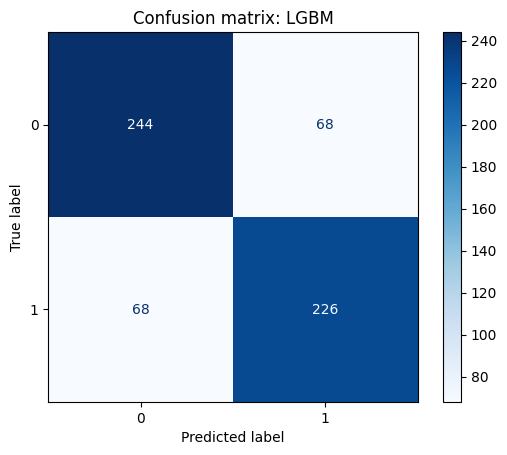

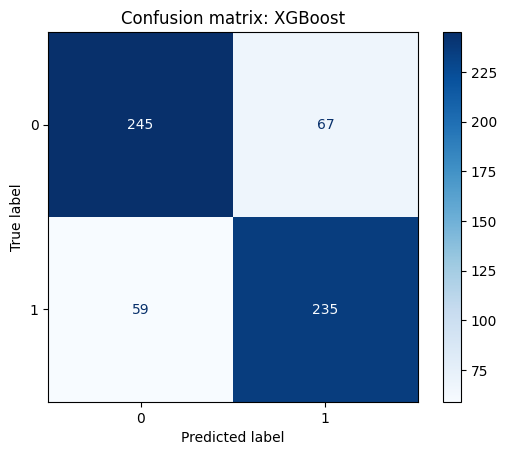

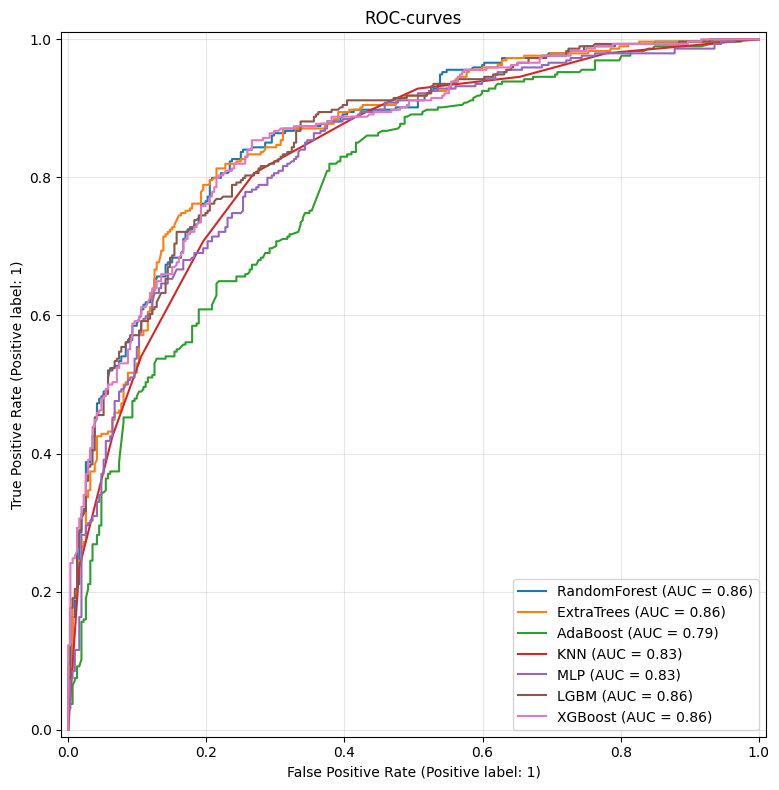

In [56]:
#7 ML Algorithms Comparison without subdivision into steroidal and non steroidal compounds with the usage of CDK FP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    roc_auc_score, accuracy_score, recall_score,
    precision_score, f1_score, log_loss,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


df1 = pd.read_excel('CDK_FP_Steroidal_Non_Steroidal.xlsx')
df = df1.drop('SMILES', axis=1)
X = df.drop('Activity', axis=1)
y = df['Activity']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_params = {
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", "log2"]
    }),
    "ExtraTrees": (ExtraTreesClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "max_features": ["sqrt", "log2"]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1.0]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }),
    "MLP": (MLPClassifier(max_iter=1000, random_state=42), {
        "hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001],
        "learning_rate": ["constant", "adaptive"]
    }),
    "LGBM": (LGBMClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "num_leaves": [31, 50],
        "max_depth": [-1, 10, 20]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 6, 10],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    })
}

results = {}
cv_results = {}
best_models = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, (model, params) in model_params.items():
    print(f"\n GridSearch for {name}")
    grid = GridSearchCV(model, params, cv=cv, scoring="neg_log_loss", n_jobs=-1, refit=True)
    grid.fit(X_train_val, y_train_val)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    scores = {m: [] for m in ["ROC-AUC", "Accuracy", "Recall", "Precision", "F1", "LogLoss"]}

    for tr_idx, val_idx in cv.split(X_train_val, y_train_val):
        X_tr, X_val = X_train_val.iloc[tr_idx], X_train_val.iloc[val_idx]
        y_tr, y_val = y_train_val.iloc[tr_idx], y_train_val.iloc[val_idx]

        best_model.fit(X_tr, y_tr)
        y_pred = best_model.predict(X_val)
        y_proba = best_model.predict_proba(X_val)[:, 1]

        scores["ROC-AUC"].append(roc_auc_score(y_val, y_proba))
        scores["Accuracy"].append(accuracy_score(y_val, y_pred))
        scores["Recall"].append(recall_score(y_val, y_pred))
        scores["Precision"].append(precision_score(y_val, y_pred))
        scores["F1"].append(f1_score(y_val, y_pred))
        scores["LogLoss"].append(log_loss(y_val, y_proba))

    results[name] = {m: np.mean(v) for m, v in scores.items()}
    cv_results[name] = scores

results_df = pd.DataFrame(results).T
print("\n Models comparison (CV):\n", results_df.sort_values("ROC-AUC", ascending=False))

for metric in ["ROC-AUC", "Accuracy", "F1", "LogLoss", "Precision", "Recall"]:
    plt.figure(figsize=(10, 6))
    df_box = pd.DataFrame({name: cv_results[name][metric] for name in model_params})
    sns.boxplot(data=df_box)
    plt.title(f"Metric's {metric} distribution across folds")
    plt.ylabel(metric)
    plt.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.savefig(f"{metric}_boxplot.png", format="png")
    plt.show()

test_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    test_results[name] = {
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "LogLoss": log_loss(y_test, y_proba)
    }

test_results_df = pd.DataFrame(test_results).T
print("\n Metrics for test set:\n", test_results_df.sort_values("ROC-AUC", ascending=False))

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion matrix: {name}")
    plt.show()


plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())
plt.title("ROC-curves")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("ROC-curves.png", format="png")
plt.show()